<a href="https://colab.research.google.com/github/Merxxotas/dataset-datacleaning_python_merxxaz/blob/master/Actividad03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 03 - ML Aprendizaje supervisado - Clasificación

**Estudiantes:** Daniela Gonzalez, Daniel Bustamente, Brayan Marin


**Fuente de los datos:** Datos Abiertos de Colombia ([Datos consolidados de la Tienda Virtual del Estado Colombiano](https://www.datos.gov.co/Gastos-Gubernamentales/Tienda-Virtual-del-Estado-Colombiano-Consolidado/rgxm-mmea)).  *Fecha actualización de los datos:* 17 de Septiembre del 2023

**Descripción de los datos:** Ordenés de compra pública hechos a través de procesos de agregación de la demanda en acuerdos marco, en la plataforma de Tienda Virtual del Estado Colombiano.

**Diccionario de Datos:**

| Nombre de la columna | Descripción | Tipo de Dato |
| -------------------- | ----------- | ------------ |
| Año | Año de la Orden de compra | Número |
| Identificador de la Orden	| Identificador de la Orden de Compra | Texto (Categórica)|
| Rama de la Entidad | Rama del estado de la Entidad que genera la Orden de Compra | Texto (Categórica) |
| Sector de la Entidad | Sector Estatal de la Entidad que genera la Orden de Compra | Texto (Categórica) |
| Entidad	| Entidad Pública que genera la Orden de compra | Texto (Categórica) |
| Orden de la Entidad | | Texto (Categórica)
| Solicitante	| Persona que hace la solicitud a nombre de la Entidad | Texto (Categórica) |
| Fecha	| Fecha de la Orden | Fecha y hora |
| NIT Entidad	| El identificador NIT de la entidad | Texto (Categórica) |
| Proveedor	| Proveedor al cual se hace la solicitud de compra pública | Texto (Categórica) |
| Estado | Estado de la Orden | Texto (Categórica) |
| Items	| Items relacionados en la orden de compra | Texto (Categórica) |
| Total	| Valor total de la Orden de compra | Número |
| Agregacion	| Agregacion a la que corresponde la Orden de compra | Texto (Categórica) |
| Solicitud	| Identificador de la Solicitud de Compra | Número |
| Ciudad | Ciudad registrada en la orden de compra | Texto (Categórica) |
| Entidad Obigada	| Determina si la entidad esta obligada a hacer unso de la Tienda Virtual del Estado Colombiano | Texto (Categórica) |
| EsPostconflicto	| Determina si la orden de compra corresponde con procesos de compra pública asociados a eventos de postconflicto en el marco del proceso de paz | Texto (Categórica) |
| NIT proveedor	| El identificador NIT del Proveedor | |
| Actividad Economica Proveedor | Actividad economica del proveedor| |

## Preparación del entorno Python y lectura de los datos.
---


> Instalación de paquetes y librerías requeridos para realizar el proceso de data cleaning y creación del modelo de aprendizaje.

In [ ]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as ticker

In [ ]:
from sklearn import datasets
import phik
from phik import  resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import plot_correlation_matrix
import collections
import networkx as nx

#importamos los diferentes algoritmos de sklearn a utilizar para la creación de modelos de aprendizaje

# Label enconding
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

# Modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# sklearn metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report

# Modelo Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Modelo SVC (Support Vector Classifier)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.naive_bayes import ComplementNB, CategoricalNB

> Cargamos el documento csv

Realizaremos el cargue del documento csv para convertirlo en un Data Frame al cual realizaremos el proceso de data cleaning.

In [ ]:
# Montaje de unidad de Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lectura del archivo csv
#data_frame = pd.read_csv('/content/drive/MyDrive/Aprendizaje de Máquinas/Actividad 2/Tienda_Virtual_del_Estado_Colombiano_-_Consolidado.csv',encoding='utf-8')

data_frame = pd.read_csv('/content/drive/MyDrive/U/Aprendizaje de Máquinas/Actividad 2/Tienda_Virtual_del_Estado_Colombiano_-_Consolidado.csv',encoding='utf-8')

# data_frame = pd.read_csv('/content/drive/MyDrive/COS/pruebacolabcsv/Tienda_Virtual_del_Estado_Colombiano_-_Consolidado.csv',encoding='utf-8')


old_data_frame=data_frame

<ipython-input-6-15d2424d3a72>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('/content/drive/MyDrive/COS/pruebacolabcsv/Tienda_Virtual_del_Estado_Colombiano_-_Consolidado.csv',encoding='utf-8')


### Análisis exploratorio de los datos

In [ ]:
# Visualización de los datos
data_frame

,Año,Identificador de la Orden,Agregacion,Rama de la Entidad,Sector de la Entidad,Entidad,Orden de la Entidad,NIT Entidad,Solicitante,Fecha,Proveedor,Estado,Solicitud,Items,Total,Ciudad,Entidad Obigada,EsPostconflicto,NIT proveedor,Actividad Economica Proveedor
0,2023,104914,Combustible Nacional,No Definido,No Definido,No Definido,No Definido,NaN,Juan Luna Toro,02/17/2023 12:00:00 AM,Sodexo SAS,Emitida,157390.0,Combustible Categora C,3.183000e+06,Cali,No Definido,No Definido,800219876,8299
1,2023,104914,Combustible Nacional,No Definido,No Definido,No Definido,No Definido,NaN,Juan Luna Toro,02/17/2023 12:00:00 AM,Sodexo SAS,Emitida,157390.0,Combustible Categora C,3.183000e+06,Cali,No Definido,No Definido,800219876,8299
2,2022,100781,Combustible Nacional II,Ejecutiva,Defensa Nacional,ESCUELA DE POLICIA SIMON BOLIVAR,Nacional,800141336.0,Deiber Marulanda Pineda,11/29/2022 12:00:00 AM,Sodexo SAS,Emitida,152887.0,Combustible Categora C,1.100000e+08,Tulua,Obligada,No Definido,800219876,8299
3,2022,100781,Combustible Nacional II,Ejecutiva,Defensa Nacional,ESCUELA DE POLICIA SIMON BOLIVAR,Nacional,800141336.0,Deiber Marulanda Pineda,11/29/2022 12:00:00 AM,Sodexo SAS,Emitida,152887.0,Combustible Categora C,1.100000e+08,Tulua,Obligada,No Definido,800219876,8299
4,2022,101221,Combustible Nacional II,Ejecutiva,No Aplica,VALLE DEL CAUCAMUNICIPIO DE EL DOVIO,Territorial,891901223.0,MIGUEL GUZMAN GARCIA,12/04/2022 12:00:00 AM,Sodexo SAS,Emitida,174673.0,Combustible Categora C,5.000000e+06,El Dovio,NaN,No Definido,800219876,8299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855484,2020,58654,Grandes Superficies,Ejecutiva,Justicia y del Derecho,IPIALES ESTABLECIMIENTO PENITENCIARIO Y CARCE...,Nacional,837000111.0,Julio Vicente Cortes Arroyo,11/14/2020 12:00:00 AM,Falabella de Colombia SA,Cerrada,104053.0,387 Unidad of COLCHONETA CREMALLERA EN L 9019...,5.991998e+07,Ipiales,Obligada,No Definido,900017447,4719
855485,2022,96125,IAD Software I Microsoft,Ejecutiva,NaN,DISTRITO ESPECIAL DE CIENCIA TECNOLOGA E INNOV...,Territorial,890905211.0,Diana Juliet Sanchez Rivera,09/15/2022 12:00:00 AM,Unin Temporal DELL EMC,Cerrada,164955.0,wms01AAA10842EAEASENT Microsoft O365 E3 Subsc...,2.538684e+09,Medellin,No obligada,No Definido,901399373,4741
855486,2022,96125,IAD Software I Microsoft,Ejecutiva,NaN,DISTRITO ESPECIAL DE CIENCIA TECNOLOGA E INNOV...,Territorial,890905211.0,Diana Juliet Sanchez Rivera,09/15/2022 12:00:00 AM,Unin Temporal DELL EMC,Cerrada,164955.0,wms01AAA10842EAEASENT Microsoft O365 E3 Subsc...,2.538684e+09,Medellin,No obligada,No Definido,901399373,4741
855487,2019,40628,Grandes Superficies,Ejecutiva,Informacin Estadstica,DANE VALLE DEL CAUCA,Nacional,899999027.0,Diego Fernando Ospina Toro,09/11/2019 12:00:00 AM,PANAMERICANA LIBRERA Y PAPELERA SA,Emitida,68005.0,600 Unidad of LAPIZ N2 HB PAPER MATE UNIDAD Co...,5.810038e+06,cali,Obligada,No Definido,830037946,4761


In [ ]:
# Dimensiones del Data Frame
tamano_inicial = data_frame.shape
print(f"Dimensiones iniciales del data frame: {tamano_inicial}")

Dimensiones iniciales del data frame: (855489, 20)


In [ ]:
# Detalle de los datos
data_frame.describe(include='all')

,Año,Identificador de la Orden,Agregacion,Rama de la Entidad,Sector de la Entidad,Entidad,Orden de la Entidad,NIT Entidad,Solicitante,Fecha,Proveedor,Estado,Solicitud,Items,Total,Ciudad,Entidad Obigada,EsPostconflicto,NIT proveedor,Actividad Economica Proveedor
count,855489.000000,855489,853757,854957,780550,855489,854957,838099,855489,855489,855489,855489,847729.000000,855489,8.554890e+05,855489,844249,855489,855489,855489
unique,NaN,115984,170,5,26,2581,3,3953,9750,2919,1151,4,NaN,93599,NaN,2640,3,1,956,190
top,NaN,114355,Grandes Superficies,Ejecutiva,Defensa Nacional,No Definido,Nacional,899999061,Ricardo Varon Romero,05/23/2022 12:00:00 AM,PANAMERICANA LIBRERA Y PAPELERA SA,Emitida,NaN,Combustible Categora C,NaN,BOGOTA,Obligada,No Definido,No Aplica,No Definido
freq,NaN,58,218991,703307,185492,17386,551595,31020,3110,2154,88881,622094,NaN,14511,NaN,104599,488685,855489,111280,111280
mean,2020.263842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113130.373608,NaN,2.954037e+08,NaN,NaN,NaN,NaN,NaN
std,2.374093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59556.455521,NaN,3.449305e+09,NaN,NaN,NaN,NaN,NaN
min,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59454.000000,NaN,4.063850e+06,NaN,NaN,NaN,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123136.000000,NaN,1.999160e+07,NaN,NaN,NaN,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167708.000000,NaN,9.855427e+07,NaN,NaN,NaN,NaN,NaN


## Proceso de Data Cleaning
---


> Eliminación de datos duplicados

In [ ]:
#Eliminamos los datos duplicados
data_frame.drop_duplicates(inplace=True)

# Restablecer el índice
data_frame = data_frame.reset_index()

data_frame.shape


(236287, 21)


> Eliminación de datos irrelevantes

Se eliminan las columnas no necesarias para el análisis de los datos con el objetivo de resolver las preguntas del negocio.

In [ ]:
#Eliminamos datos irrelevantes

#Datos a conservar (datos relevantes)
campos=['Año', 'Agregacion', 'Sector de la Entidad', 'Entidad',
        'Proveedor', 'Estado', 'Solicitud', 'Total' ]
data_frame = data_frame[campos]

#Data Frame con datos irrelevantes para el análisis propuesto
data_frame

,Año,Agregacion,Sector de la Entidad,Entidad,Proveedor,Estado,Solicitud,Total
0,2023,Combustible Nacional,No Definido,No Definido,Sodexo SAS,Emitida,157390.0,3183000.0
1,2022,Combustible Nacional II,Defensa Nacional,ESCUELA DE POLICIA SIMON BOLIVAR,Sodexo SAS,Emitida,152887.0,110000000.0
2,2022,Combustible Nacional II,No Aplica,VALLE DEL CAUCAMUNICIPIO DE EL DOVIO,Sodexo SAS,Emitida,174673.0,5000000.0
3,2022,Combustible Nacional II,Defensa Nacional,CENAC ING,Sodexo SAS,Emitida,175719.0,492199550.0
4,2023,Combustible Nacional II,No Aplica,CUNDINAMARCA ALCALDIA DE FUQUENE,Sodexo SAS,Emitida,156642.0,342000000.0
...,...,...,...,...,...,...,...,...
236282,2022,Emergencia COVID19,Educacin Nacional,INSTITUTO COLOMBIANO DE CREDITO EDUCATIVO Y ES...,CLEANER SA,Emitida,152589.0,1291551.0
236283,2019,Consumibles de Impresin,Defensa Nacional,FUERZA AEREA COLOMBIANA BASE AEREA COMANDO FU...,SumimasSAS,Cerrada,64588.0,158567499.0
236284,2016,Servicios Oracle,Defensa Nacional,CENTRAL ADMINISTRATIVA Y CONTABLE ESPECIALIZAD...,Oracle Colombia Ltda,Emitida,14763.0,37627297.0
236285,2022,Grandes Superficies,Justicia y del Derecho,ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO DE...,CENCOSUD COLOMBIA SA,Emitida,158139.0,3280672.0


> Tratamiento de datos faltantes

Los registros con datos faltantes son identificados y son eliminados.


In [ ]:
# Validar registros con campos con valores NaN o vacios
data_frame.isna().sum()

Año                         0
Agregacion                222
Sector de la Entidad    19747
Entidad                     0
Proveedor                   0
Estado                      0
Solicitud                1214
Total                       0
dtype: int64

In [ ]:
# Eliminamos filas que tengas valores NaN o vacios
# Nota: campo Solicitud lo requiere para su conversión a dato numérico
data_frame.dropna(inplace=True)

# Restablecer el índice
data_frame = data_frame.reset_index()



> Estandarización de formatos




In [ ]:
# Corrección de los tipos de datos de las columnas

# Verificamos los tipos de las columnas por defecto
print(f"Tipos de columna por defecto del dataFrame:\n{data_frame.dtypes}\n--------------------------------------------------")

data_frame['Año'] = data_frame['Año'].astype(int)
data_frame['Agregacion'] = data_frame['Agregacion'].astype(str)
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].astype(str)
data_frame['Entidad'] = data_frame['Entidad'].astype(str)
data_frame['Proveedor'] = data_frame['Proveedor'].astype(str)
data_frame['Estado'] = data_frame['Estado'].astype(str)
data_frame['Solicitud'] = data_frame['Solicitud'].astype(int)
data_frame['Total'] = data_frame['Total'].astype(float).round(2)

#Verificamos los tipos de las columnas por defecto
print(f"\nNuevos tipos de columnas del dataFrame:\n{data_frame.dtypes}")

Tipos de columna por defecto del dataFrame:
index                     int64
Año                       int64
Agregacion               object
Sector de la Entidad     object
Entidad                  object
Proveedor                object
Estado                   object
Solicitud               float64
Total                   float64
dtype: object
--------------------------------------------------

Nuevos tipos de columnas del dataFrame:
index                     int64
Año                       int64
Agregacion               object
Sector de la Entidad     object
Entidad                  object
Proveedor                object
Estado                   object
Solicitud                 int64
Total                   float64
dtype: object


In [ ]:
# Capitalizar la primera letra de cada valor de la columna "Entidad"
data_frame['Entidad'] = data_frame['Entidad'].str.title()

data_frame

,index,Año,Agregacion,Sector de la Entidad,Entidad,Proveedor,Estado,Solicitud,Total
0,0,2023,Combustible Nacional,No Definido,No Definido,Sodexo SAS,Emitida,157390,3183000.0
1,1,2022,Combustible Nacional II,Defensa Nacional,Escuela De Policia Simon Bolivar,Sodexo SAS,Emitida,152887,110000000.0
2,2,2022,Combustible Nacional II,No Aplica,Valle Del Caucamunicipio De El Dovio,Sodexo SAS,Emitida,174673,5000000.0
3,3,2022,Combustible Nacional II,Defensa Nacional,Cenac Ing,Sodexo SAS,Emitida,175719,492199550.0
4,4,2023,Combustible Nacional II,No Aplica,Cundinamarca Alcaldia De Fuquene,Sodexo SAS,Emitida,156642,342000000.0
...,...,...,...,...,...,...,...,...,...
215220,236282,2022,Emergencia COVID19,Educacin Nacional,Instituto Colombiano De Credito Educativo Y Es...,CLEANER SA,Emitida,152589,1291551.0
215221,236283,2019,Consumibles de Impresin,Defensa Nacional,Fuerza Aerea Colombiana Base Aerea Comando Fu...,SumimasSAS,Cerrada,64588,158567499.0
215222,236284,2016,Servicios Oracle,Defensa Nacional,Central Administrativa Y Contable Especializad...,Oracle Colombia Ltda,Emitida,14763,37627297.0
215223,236285,2022,Grandes Superficies,Justicia y del Derecho,Establecimiento Penitenciario Y Carcelario De...,CENCOSUD COLOMBIA SA,Emitida,158139,3280672.0


In [ ]:
datos_unicos_df = data_frame['Entidad'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

,Entidad
0,No Definido
1,Escuela De Policia Simon Bolivar
2,Valle Del Caucamunicipio De El Dovio
3,Cenac Ing
4,Cundinamarca Alcaldia De Fuquene
...,...
2418,Sucre Institucion Educativa Ismael Contreras ...
2419,Alcaldia Municipal La Cruz Nari�O
2420,Bogotacolegio Espa�A Ied
2421,Contraloria Distrital De Medellin


In [ ]:
# Capitalizar la primera letra de cada valor del campo Proveedor
# Separar las palabras y capitalizar la primera letra de cada palabra
data_frame['Proveedor'] = data_frame['Proveedor'].str.title()

# Encontrar la última palabra en cada fila y ponerla en mayúsculas
data_frame['Proveedor'] = data_frame['Proveedor'].apply(lambda x: ' '.join([word if i < len(x.split()) - 1 else word.upper() for i, word in enumerate(x.split())]))

data_frame

,index,Año,Agregacion,Sector de la Entidad,Entidad,Proveedor,Estado,Solicitud,Total
0,0,2023,Combustible Nacional,No Definido,No Definido,Sodexo SAS,Emitida,157390,3183000.0
1,1,2022,Combustible Nacional II,Defensa Nacional,Escuela De Policia Simon Bolivar,Sodexo SAS,Emitida,152887,110000000.0
2,2,2022,Combustible Nacional II,No Aplica,Valle Del Caucamunicipio De El Dovio,Sodexo SAS,Emitida,174673,5000000.0
3,3,2022,Combustible Nacional II,Defensa Nacional,Cenac Ing,Sodexo SAS,Emitida,175719,492199550.0
4,4,2023,Combustible Nacional II,No Aplica,Cundinamarca Alcaldia De Fuquene,Sodexo SAS,Emitida,156642,342000000.0
...,...,...,...,...,...,...,...,...,...
215220,236282,2022,Emergencia COVID19,Educacin Nacional,Instituto Colombiano De Credito Educativo Y Es...,Cleaner SA,Emitida,152589,1291551.0
215221,236283,2019,Consumibles de Impresin,Defensa Nacional,Fuerza Aerea Colombiana Base Aerea Comando Fu...,SUMIMASSAS,Cerrada,64588,158567499.0
215222,236284,2016,Servicios Oracle,Defensa Nacional,Central Administrativa Y Contable Especializad...,Oracle Colombia LTDA,Emitida,14763,37627297.0
215223,236285,2022,Grandes Superficies,Justicia y del Derecho,Establecimiento Penitenciario Y Carcelario De...,Cencosud Colombia SA,Emitida,158139,3280672.0


In [ ]:
datos_unicos_df = data_frame['Proveedor'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

,Proveedor
0,Sodexo SAS
1,Organizacin Terpel SA
2,POLYFLEX
3,Ofix SAS
4,Inversiones El Norte SAS
...,...
1106,Compa�A Internacional De Integracin Sa Ci2 SA
1107,Sandra Patricia Ca�N CHAPARRO
1108,Manpower Cis Sas Manpower Compa�A Integral De ...
1109,Ut TEXTIMODA


In [ ]:
datos_unicos_df = data_frame['Estado'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

,Estado
0,Emitida
1,Cerrada
2,Cancelada
3,CerradaxError


In [ ]:
datos_unicos_df = data_frame['Solicitud'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

,Solicitud
0,157390
1,152887
2,174673
3,175719
4,156642
...,...
102042,197595
102043,197615
102044,197312
102045,194079


In [ ]:
datos_unicos_df_total = data_frame['Total'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df_total

,Total
0,3183000.0
1,110000000.0
2,5000000.0
3,492199550.0
4,342000000.0
...,...
92892,51195700.0
92893,157488531.0
92894,42996857.0
92895,5246820.0


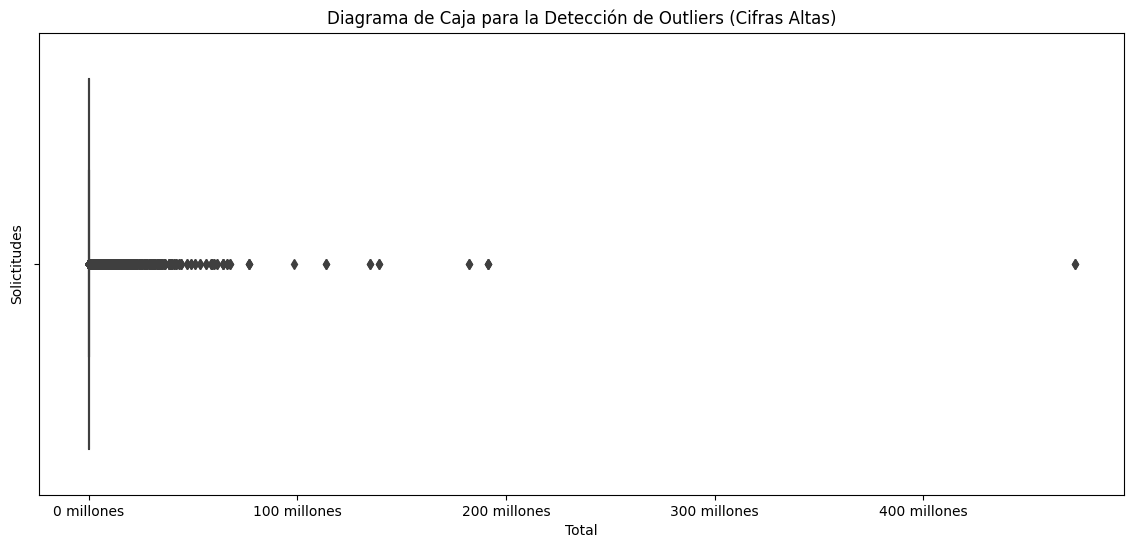

In [ ]:
# Crear un diagrama de caja (boxplot) para visualizar outliers
plt.figure(figsize=(14, 6))
sns.boxplot(x=data_frame['Total'])
plt.title('Diagrama de Caja para la Detección de Outliers (Cifras Altas)')
plt.xlabel('Total')

# Personalizar las etiquetas del eje x para mostrar en "millones"
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e09:.0f} millones'))

plt.ylabel('Solictitudes')
plt.show()



> Corrección de errores tipográficos o de entrada



In [ ]:
# Corrección errores tipográficos

# Corregimos errores tipográficos del campo Agregacion
diccionario_agregacion = {
    r'\b(.istribucin)': 'Distribución',
    r'\b(.mpresin)': 'Impresión',
    r'\b(tiles)': 'útiles',
    r'\b(.onstruccin)': 'construcción',
    r'\b(.reos)': 'Aéreos',
    r'\b(.ehculos)': 'Vehículos',
    r'\b(.otacin)': 'Dotación',
    r'\b(.tencin)': 'Atención',
    r'\b(.dquisicin)': 'Adquisición',
    r'\b(.erifricos)': 'Periféricos',
    r'\b(Crnica)': 'Crónica',
    r'\b(.blica)': 'Pública',
    r'\b(.edaggico)': 'Pedagógico',
    r'\b(.edagogico)': 'Pedagógico',
    r'\b(.ntermediacin)': 'Intermediación',
    r'\b(.iomdicos)': 'Biomédicos',
    r'\b(.artn)': 'cartón',
    r'\b(.arton)': 'cartón',
    r'\b(.atemticas)': 'Matemáticas',
    r'\b(.mgenes )': 'Imágenes',
    r'\b(.rnsito)': 'Tránsito',
    r'\b(.ropagacin)': 'propagación',
    r'\b(.viacin)': 'Aviación',
    r'\b(.enguaje)': "Lenguaje"

}

# Realizar el reemplazo en la columna "Agregacion" usando el diccionario de agregaciones
for patron, agregacion in diccionario_agregacion.items():
    data_frame['Agregacion'] = data_frame['Agregacion'].str.replace(patron, agregacion, regex=True)


In [ ]:
datos_unicos_df = data_frame['Agregacion'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

,Agregacion
0,Combustible Nacional
1,Combustible Nacional II
2,Grandes Superficies
3,Combustible Nacional III
4,Material Pedagógico
...,...
159,Soluciones de videovigilancia
160,Dotación de Vestuario de Calle III
161,Fotovoltaicos
162,Seguro Obligatorio de Accidentes de Tránsito ...




> Manejo de datos inconsistentes



In [ ]:
# Corrección categorías mal etiquetadas

# Correción campo "Sector de la Entidad"
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'No Aplica': 'No Definido'})
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'Planeacin': 'Planeación'})
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'Funcion Publica': 'Función Pública'})
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'Hacienda y Crdito Pblico': 'Hacienda y Crédito Público'})
data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].replace({'Informacin Estadstica': 'Información Estadística'})

diccionario_sector = {
    r'\b(Proteccin)': 'Protección',
    r'\b(Tecnologa)': 'Tecnología',
    r'\b(Educacin)': 'Educación',
    r'\b(Repblica)': 'República',
    r'\b(Energa)': 'Energía',
    r'\b(Informacin)': 'Información',
    r'\b(Tecnologas)': 'Tecnologías',
    r'\b(Inclusin)': 'Inclusión',
    r'\b(reconciliacin)': 'reconciliación'
}

for patron, sector in diccionario_sector.items():
    data_frame['Sector de la Entidad'] = data_frame['Sector de la Entidad'].str.replace(patron, sector, regex=True)



In [ ]:
datos_unicos_df = data_frame['Sector de la Entidad'].drop_duplicates().reset_index(drop=True).to_frame()
datos_unicos_df

,Sector de la Entidad
0,No Definido
1,Defensa Nacional
2,Función Pública
3,Interior
4,Transporte
5,Cultura
6,Planeación
7,Salud y Protección Social
8,Relaciones Exteriores
9,Vivienda Ciudad y Territorio


In [ ]:
# Dimensiones del Data Frame
tamano_final = data_frame.shape
print(f"Dimensiones del data frame luego del proceso de data cleaning: {tamano_final}")

Dimensiones del data frame luego del proceso de data cleaning: (215225, 9)


# **Resultados del Data Cleaning**

In [ ]:
print(f"Cantidad de datos del data set original: {tamano_inicial[0]}")

Cantidad de datos del data set original: 855489


In [ ]:
print(f"Cantidad de datos al finalizar el proceso de data cleaning: {tamano_final[0]}")

Cantidad de datos al finalizar el proceso de data cleaning: 215225


In [ ]:
# Calculo porcentaje de depuración de registros
diferencia_registros = tamano_inicial[0] - tamano_final[0]
porcentaje_diferencia = (diferencia_registros /tamano_inicial[0] ) * 100

print(f"Al finalizar el proceso de data cleaning se han eliminado el {porcentaje_diferencia:.2f}% de los registros del data set original")

Al finalizar el proceso de data cleaning se han eliminado el 74.84% de los registros del data set original


In [ ]:
data_frame


,index,Año,Agregacion,Sector de la Entidad,Entidad,Proveedor,Estado,Solicitud,Total
0,0,2023,Combustible Nacional,No Definido,No Definido,Sodexo SAS,Emitida,157390,3183000.0
1,1,2022,Combustible Nacional II,Defensa Nacional,Escuela De Policia Simon Bolivar,Sodexo SAS,Emitida,152887,110000000.0
2,2,2022,Combustible Nacional II,No Definido,Valle Del Caucamunicipio De El Dovio,Sodexo SAS,Emitida,174673,5000000.0
3,3,2022,Combustible Nacional II,Defensa Nacional,Cenac Ing,Sodexo SAS,Emitida,175719,492199550.0
4,4,2023,Combustible Nacional II,No Definido,Cundinamarca Alcaldia De Fuquene,Sodexo SAS,Emitida,156642,342000000.0
...,...,...,...,...,...,...,...,...,...
215220,236282,2022,Emergencia COVID19,Educación Nacional,Instituto Colombiano De Credito Educativo Y Es...,Cleaner SA,Emitida,152589,1291551.0
215221,236283,2019,Consumibles de Impresión,Defensa Nacional,Fuerza Aerea Colombiana Base Aerea Comando Fu...,SUMIMASSAS,Cerrada,64588,158567499.0
215222,236284,2016,Servicios Oracle,Defensa Nacional,Central Administrativa Y Contable Especializad...,Oracle Colombia LTDA,Emitida,14763,37627297.0
215223,236285,2022,Grandes Superficies,Justicia y del Derecho,Establecimiento Penitenciario Y Carcelario De...,Cencosud Colombia SA,Emitida,158139,3280672.0


## ML Aprendizaje
---

> Análisis de la distribución de los datos según clase (campo **Estado**)

In [ ]:
data_ml=data_frame

#Revisamos el campo a clasificar
print(f"Clasificacion de Estados\n{data_ml['Estado'].value_counts()}")

Clasificacion de proveedores
Emitida          147217
Cerrada           61147
Cancelada          6855
CerradaxError         6
Name: Estado, dtype: int64


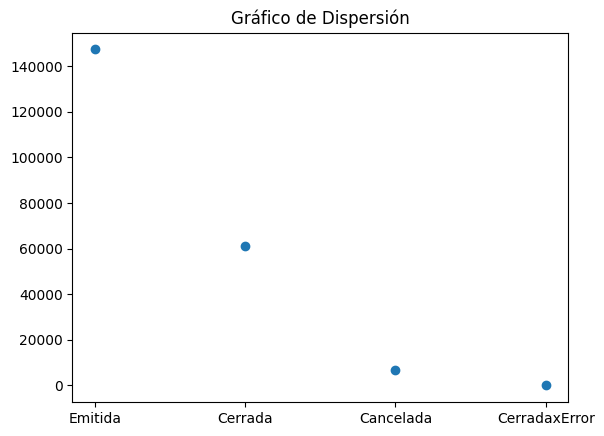

In [ ]:
counter = collections.Counter(data_ml['Estado'])
numbers = list(counter.keys())
counts = list(counter.values())
plt.scatter(numbers, counts)
plt.title('Gráfico de Dispersión')

plt.show()

In [ ]:
# Análisis de correlaciones de los datos
correc_mat = data_ml.phik_matrix()



> Definición variables dependiente e independientes



In [ ]:
# Variables independiente: Agregación, Proveedor, sector de la entidad
x = data_ml[['Agregacion','Sector de la Entidad','Proveedor']].values
print(x)

[['Combustible Nacional' 'No Definido' 'Sodexo SAS']
 ['Combustible Nacional II' 'Defensa Nacional' 'Sodexo SAS']
 ['Combustible Nacional II' 'No Definido' 'Sodexo SAS']
 ...
 ['Servicios Oracle' 'Defensa Nacional' 'Oracle Colombia LTDA']
 ['Grandes Superficies' 'Justicia y del Derecho' 'Cencosud Colombia SA']
 ['Grandes Superficies' 'Función Pública' 'Cencosud Colombia SA']]


In [ ]:
# Variable dependiente (variable a predecir): Estado de la solicitud
y = data_ml["Estado"]

print(y)

0         Emitida
1         Emitida
2         Emitida
3         Emitida
4         Emitida
           ...   
215220    Emitida
215221    Cerrada
215222    Emitida
215223    Emitida
215224    Emitida
Name: Estado, Length: 215225, dtype: object


> Label encoding

Transformación de datos categóricos a numéricos (continuos)



In [ ]:
le = preprocessing.LabelEncoder()

Codificar variable dependiente

In [ ]:
le.fit(y)

LabelEncoder()

In [ ]:
le.classes_

array(['Cancelada', 'Cerrada', 'CerradaxError', 'Emitida'], dtype=object)

In [ ]:
y_cod = le.transform(y)

In [ ]:
y_cod

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
# Validación de la codificación
le.inverse_transform([0,1,2,3])

array(['Cancelada', 'Cerrada', 'CerradaxError', 'Emitida'], dtype=object)

Codificar variables independientes

In [ ]:
# Codificación campo Agregacion
le2 = preprocessing.LabelEncoder()
le2.fit(x[:,0])

LabelEncoder()

In [ ]:
le2.classes_

array(['Acceso Banda Ancha Municipios', 'Acuerdos Marco de Precios',
       'Adquisición de Computadores y Periféricos',
       'Adquisición de Imágenespor plataformas satelitales',
       'Alimentos y Medicamentos para Animales', 'Almacenamiento PAE',
       'Almacenamiento PAE II', 'Alquiler de ETP II', 'ArcGIS',
       'Arriendo ETP', 'Aseo y Cafetera', 'Aseo y Cafetera II',
       'Aseo y Cafetera III', 'Aseo y Cafetera IV',
       'Atención a Emergencias', 'Atención emergencia COVID19',
       'Ayudas Humanitarias', 'Blindaje', 'Centro Datos  Nube Privada',
       'Centro de Contacto', 'Centro de contacto', 'Combustible Bogot',
       'Combustible Bogot I', 'Combustible Bogot II',
       'Combustible Nacional', 'Combustible Nacional II',
       'Combustible Nacional III', 'Combustible de Aviación',
       'Compra de ETP II', 'Conectividad', 'Conectividad II',
       'Conectividad III', 'Consumibles de Impresión',
       'Consumibles de Impresión II',
       'Derivados del papel ca

In [ ]:
# Reemplazar en array original
x[:, 0] = le2.transform(x[:,0])

In [ ]:
# Codificación campo 'Sector de la Entidad'
le3 = preprocessing.LabelEncoder()
le3.fit(x[:,1])

LabelEncoder()

In [ ]:
le3.classes_

array(['Agricultura y Desarrollo Rural',
       'Ambiente y Desarrollo Sostenible', 'Ciencia y Tecnología',
       'Comercio Industria y Turismo', 'Cultura', 'Defensa Nacional',
       'Deporte', 'Educación Nacional', 'Función Pública',
       'Hacienda y Crédito Público', 'Inclusión social y reconciliación',
       'Información Estadística',
       'Inteligencia Estrategica y Contrainteligencia', 'Interior',
       'Justicia y del Derecho', 'Minas y Energía', 'No Definido',
       'Planeación', 'Presidencia de la República',
       'Relaciones Exteriores', 'Salud y Protección Social',
       'Tecnologías de la Información y las comunicaciones', 'Trabajo',
       'Transporte', 'Vivienda Ciudad y Territorio'], dtype=object)

In [ ]:
# Reemplazar en array original
x[:, 1] = le3.transform(x[:,1])

In [ ]:
# Codificación campo 'Proveedor'
le4 = preprocessing.LabelEncoder()
le4.fit(x[:,2])

LabelEncoder()

In [ ]:
le4.classes_

array(['3P Pharmaceutic SAS', '7M Group SA', 'A2 Lactijacunin TEMPORAL',
       ..., 'Yokomotor SA', 'Yubarta SAS', 'Zidcar SAS'], dtype=object)

In [ ]:
# Reemplazar en array original
x[:, 2] = le4.transform(x[:,2])

In [ ]:
# Array final
x

array([[24, 16, 756],
       [25, 5, 756],
       [25, 16, 756],
       ...,
       [138, 5, 616],
       [56, 14, 115],
       [56, 8, 115]], dtype=object)


> División de datos de entrenamiento, prueba y validación

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y_cod, test_size= 0.05, random_state= 5, stratify= y_cod)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size= 0.15, random_state= 5, stratify= y_train)

In [ ]:
x_train

array([[24, 5, 619],
       [33, 5, 498],
       [122, 0, 719],
       ...,
       [22, 5, 833],
       [48, 14, 9],
       [127, 2, 508]], dtype=object)

In [ ]:
y_train

array([1, 1, 3, ..., 1, 3, 3])

In [ ]:
# Validación de datos
print(np.unique(y,return_counts=True))
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))
print(np.unique(y_val,return_counts=True))

(array(['Cancelada', 'Cerrada', 'CerradaxError', 'Emitida'], dtype=object), array([  6855,  61147,      6, 147217]))
(array([0, 1, 2, 3]), array([  5535,  49376,      5, 118877]))
(array([0, 1, 2, 3]), array([  977,  8713,     1, 20979]))
(array([0, 1, 3]), array([ 343, 3058, 7361]))


In [ ]:
classes = np.unique(y)

classes

array(['Cancelada', 'Cerrada', 'CerradaxError', 'Emitida'], dtype=object)

# **Modelo con KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 5, metric= 'euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
train_acc = knn.score(x_train, y_train)
test_acc = knn.score(x_test,y_test)

# Métrica de entrenamiento
print(train_acc)

# Métrica de test
print(test_acc)

0.7202418969693831
0.6988588196935116


Reporte del modelo con KNN

In [ ]:
y_train_pred = knn.predict(x)
print(classification_report(y_cod, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.34      0.14      0.20      6855
           1       0.55      0.48      0.52     61147
           2       0.00      0.00      0.00         6
           3       0.78      0.84      0.81    147217

    accuracy                           0.72    215225
   macro avg       0.42      0.37      0.38    215225
weighted avg       0.70      0.72      0.71    215225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusión del modelo



In [ ]:
y_pred = knn.predict(x_test)

matrix_c = confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True0'],colnames=['Predicciones'],margins=True)

Predicciones,0,1,3,All
True0,,,,
0,106,236,635,977
1,97,3925,4691,8713
2,0,0,1,1
3,200,3376,17403,20979
All,403,7537,22730,30670


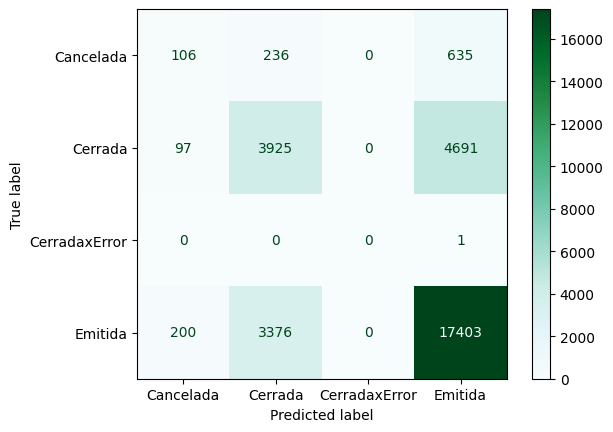

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_c, display_labels= classes)

disp.plot(cmap= plt.cm.BuGn)

In [ ]:
print(f"El accuracy del modelo KNN es: {metrics.accuracy_score(y_pred,y_test)}")

El accuracy del modelo KNN es: 0.6988588196935116


# **Modelo con Árboles de Decisión**



In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit (x_train, y_train)

DecisionTreeClassifier()

In [ ]:
train_acc = decision_tree.score(x_train, y_train)
test_acc = decision_tree.score(x_test,y_test)

# Métrica de entrenamiento
print(train_acc)

# Métrica de test
print(test_acc)

0.7608419211360642
0.7429735898271927


Reporte del modelo con Árboles de Decisión

In [ ]:
y_train_pred = decision_tree.predict(x)
print(classification_report(y_cod, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      0.11      0.19      6855
           1       0.68      0.44      0.54     61147
           2       0.00      0.00      0.00         6
           3       0.77      0.92      0.84    147217

    accuracy                           0.76    215225
   macro avg       0.53      0.37      0.39    215225
weighted avg       0.74      0.76      0.73    215225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusión del modelo

In [ ]:
y_pred_tree = decision_tree.predict(x_test)
matrix_c = confusion_matrix(y_test, y_pred_tree)

pd.crosstab(y_test, y_pred_tree, rownames=['True0'],colnames=['Predicciones'],margins=True)

Predicciones,0,1,3,All
True0,,,,
0,80,112,785,977
1,25,3628,5060,8713
2,0,0,1,1
3,68,1832,19079,20979
All,173,5572,24925,30670


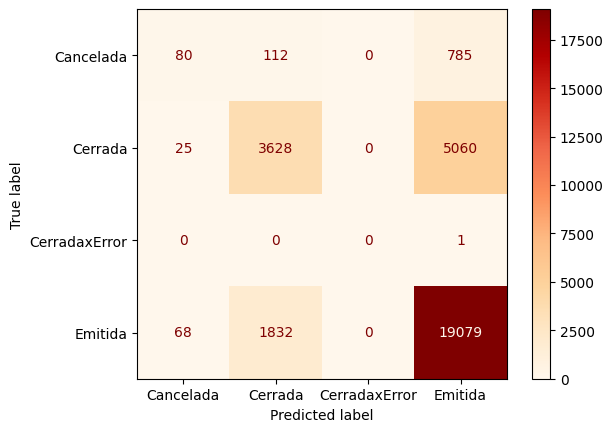

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_c, display_labels= classes)

disp.plot(cmap= plt.cm.OrRd)

In [ ]:
print(f"El accuracy del modelo Árboles de decisión es: {metrics.accuracy_score(y_pred_tree,y_test)}")

El accuracy del modelo Árboles de decisión es: 0.7429735898271927


Árbol de Decisión

[Text(0.30103099224494423, 0.9861111111111112, '[25 5 756] <= 6.5\ngini = 0.45\nsamples = 173793\nvalue = [5535, 49376, 5, 118877]\nclass = Emitida'),
 Text(0.1186351991343086, 0.9583333333333334, '[25 5 756] <= 4.5\ngini = 0.493\nsamples = 59995\nvalue = [1782, 21111, 5, 37097]\nclass = Emitida'),
 Text(0.038580571290463994, 0.9305555555555556, '[24 16 756] <= 11.5\ngini = 0.403\nsamples = 16760\nvalue = [440, 4010, 5, 12305]\nclass = Emitida'),
 Text(0.010074455028741486, 0.9027777777777778, '[25 16 756] <= 505.0\ngini = 0.474\nsamples = 1851\nvalue = [21, 658, 2, 1170]\nclass = Emitida'),
 Text(0.0033481759673843533, 0.875, '[25 16 756] <= 141.0\ngini = 0.404\nsamples = 659\nvalue = [12, 163, 2, 482]\nclass = Emitida'),
 Text(0.00142093768153692, 0.8472222222222222, '[25 5 756] <= 1.5\ngini = 0.518\nsamples = 121\nvalue = [7, 41, 0, 73]\nclass = Emitida'),
 Text(0.0007324421038850102, 0.8194444444444444, '[24 16 756] <= 10.5\ngini = 0.492\nsamples = 85\nvalue = [0, 37, 0, 48]\nclass

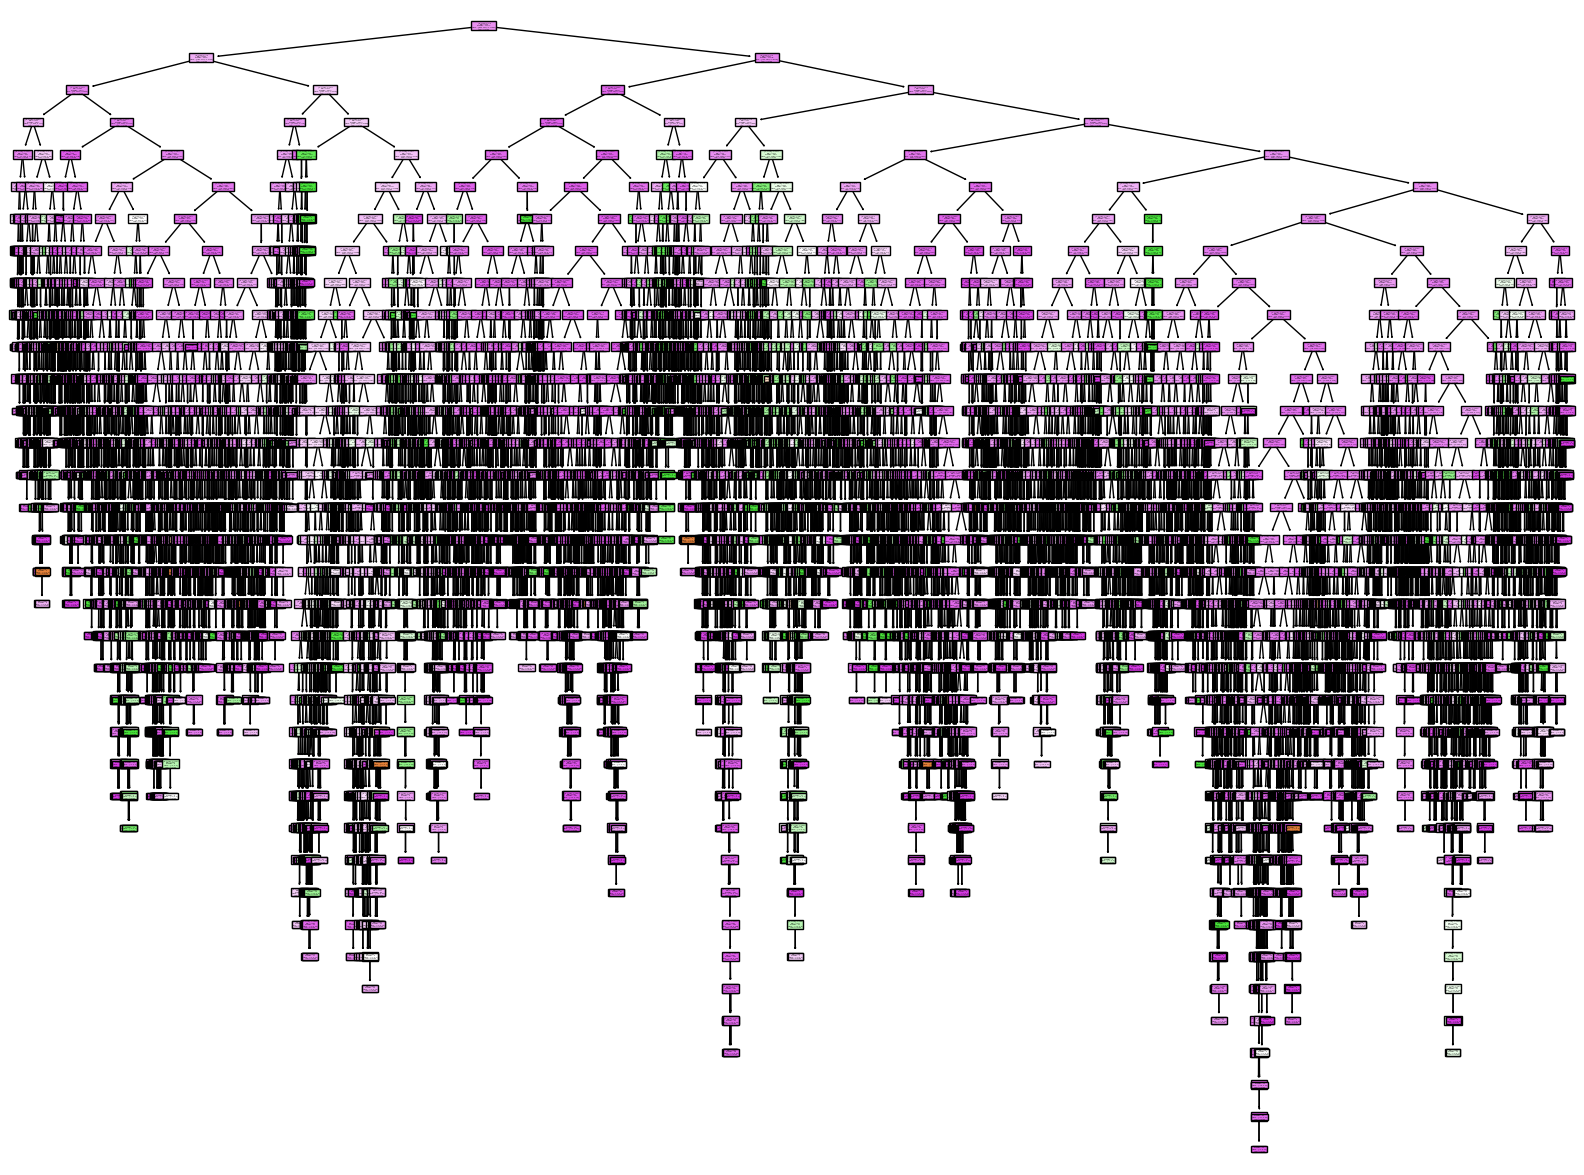

In [ ]:
fig = plt.figure(figsize=(20,15))

arbol = tree.plot_tree(decision_tree, feature_names=x, class_names=y, filled= True)
arbol

# **Reporte del modelo mediante SVC (Support Vector Classifier)**

In [ ]:
# svm = SVC(kernel='linear')
# svm.fit(x_train, y_train)

In [ ]:
# y_pred = svm.predict(x_test)
# accu = accuracy_score(y_test,y_pred)
# print(f"El accuracy del model arbol de decision es: {metrics.accuracy_score(y_pred,y_test)}")

In [ ]:
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)

SVC(kernel='sigmoid')

**Reporte del modelo con SVC (Support Vector Classifier)**

In [ ]:
train_acc = svm.score(x_train, y_train)
test_acc = svm.score(x_test,y_test)

# Métrica de entrenamiento
print(train_acc)

# Métrica de test
print(test_acc)

0.5344001196826109
0.5369090316269971


In [ ]:
y_train_pred = svm.predict(x)
print(classification_report(y_cod, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.02      0.08      0.04      6855
           1       0.27      0.18      0.22     61147
           2       0.00      0.00      0.00         6
           3       0.68      0.70      0.69    147217

    accuracy                           0.53    215225
   macro avg       0.24      0.24      0.24    215225
weighted avg       0.54      0.53      0.53    215225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Matriz de confusión del modelo**

In [ ]:
y_pred_tree = svm.predict(x_test)
matrix_c = confusion_matrix(y_test, y_pred_tree)

pd.crosstab(y_test, y_pred_tree, rownames=['True0'],colnames=['Predicciones'],margins=True)

Predicciones,0,1,3,All
True0,,,,
0,82,132,763,977
1,833,1614,6266,8713
2,1,0,0,1
3,2134,4074,14771,20979
All,3050,5820,21800,30670


In [ ]:
# Matriz de confusion
mc = confusion_matrix(y_test,y_pred)

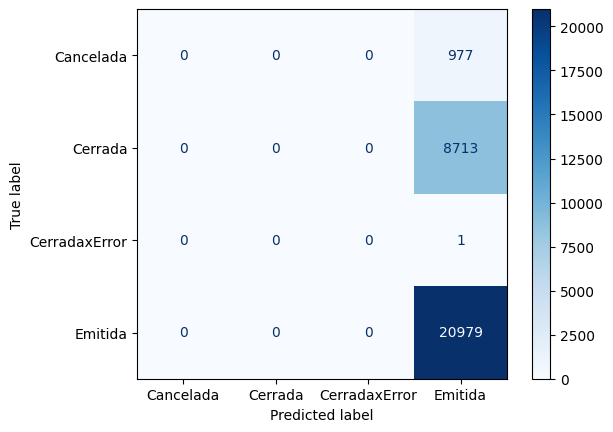

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels= classes)

disp.plot(cmap= plt.cm.Blues)

In [ ]:
y_pred = svm.predict(x_test)
accu = accuracy_score(y_test,y_pred)
print(f"El accuracy del model arbol de decision es: {metrics.accuracy_score(y_pred,y_test)}")

El accuracy del model arbol de decision es: 0.5369090316269971


# **Reporte del modelo mediante Naive Bayes**


In [ ]:
bn = GaussianNB()

In [ ]:
#Entrenamiento del modelo
bn.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = bn.predict(x_test)

**Reporte del modelo con Naive Bayes**

In [ ]:
train_acc = bn.score(x_train, y_train)
test_acc = bn.score(x_test,y_test)

# Métrica de entrenamiento
print(train_acc)

# Métrica de test
print(test_acc)

0.6840148912787051
0.684023475709162


In [ ]:
y_train_pred = bn.predict(x)
print(classification_report(y_cod, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6855
           1       0.00      0.00      0.00     61147
           2       0.00      0.00      0.00         6
           3       0.68      1.00      0.81    147217

    accuracy                           0.68    215225
   macro avg       0.17      0.25      0.20    215225
weighted avg       0.47      0.68      0.56    215225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Matriz de confusión del modelo**

In [ ]:
y_pred_tree = bn.predict(x_test)
matrix_c = confusion_matrix(y_test, y_pred_tree)

pd.crosstab(y_test, y_pred_tree, rownames=['True0'],colnames=['Predicciones'],margins=True)

Predicciones,3,All
True0,,
0,977,977
1,8713,8713
2,1,1
3,20979,20979
All,30670,30670


In [ ]:
# Matriz de confusion
mc = confusion_matrix(y_test,y_pred)

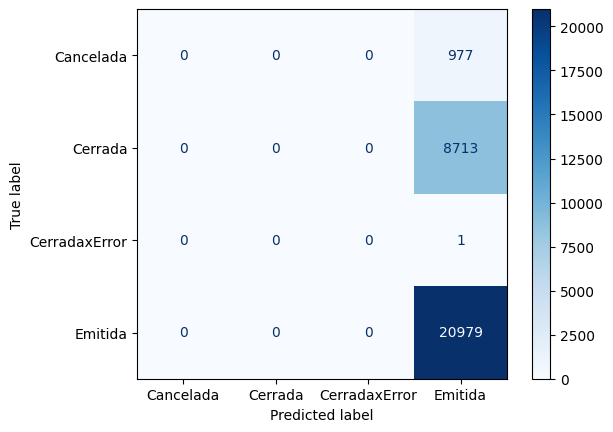

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels= classes)

disp.plot(cmap= plt.cm.Blues)

In [ ]:
print(f"El accuracy del model NB es: {metrics.accuracy_score(y_pred,y_test)}")

El accuracy del model NB es: 0.684023475709162


**Modelo naive Bayes - Multinomial**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

**Reporte del modelo con Naive Bayes - Multinomial**

In [ ]:
train_acc = mnb.score(x_train, y_train)
test_acc = mnb.score(x_test,y_test)

# Métrica de entrenamiento
print(train_acc)

# Métrica de test
print(test_acc)

0.4257939042424033
0.4274861428105641


In [ ]:
y_train_pred = mnb.predict(x)
print(classification_report(y_cod, y_train_pred))

              precision    recall  f1-score   support

           0       0.05      0.43      0.09      6855
           1       0.33      0.23      0.27     61147
           2       0.00      0.50      0.00         6
           3       0.70      0.51      0.59    147217

    accuracy                           0.43    215225
   macro avg       0.27      0.42      0.24    215225
weighted avg       0.58      0.43      0.48    215225



**Matriz de confusión del modelo**

In [ ]:
y_pred_tree = mnb.predict(x_test)
matrix_c = confusion_matrix(y_test, y_pred_tree)

pd.crosstab(y_test, y_pred_tree, rownames=['True0'],colnames=['Predicciones'],margins=True)

Predicciones,0,1,2,3,All
True0,,,,,
0,418,137,20,402,977
1,2235,2027,419,4032,8713
2,0,0,0,1,1
3,5613,3806,894,10666,20979
All,8266,5970,1333,15101,30670


In [ ]:
# Matriz de confusion
mc = confusion_matrix(y_test,y_pred)

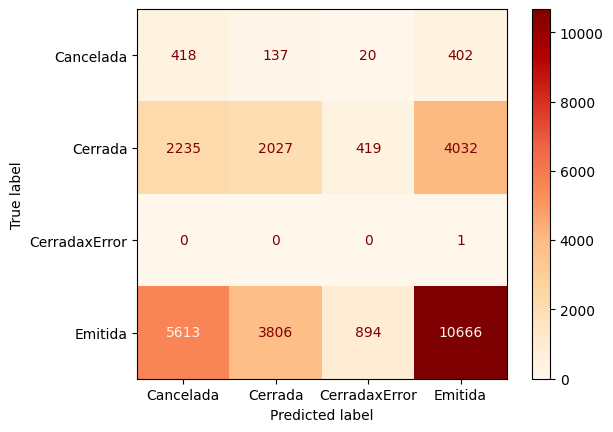

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels= classes)

disp.plot(cmap= plt.cm.OrRd)

In [ ]:
y_pred = mnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"El accuracy del modelo Multinomial Naive Bayes es: {accuracy}")

El accuracy del modelo Multinomial Naive Bayes es: 0.4274861428105641


**Modelo Naive Bayes - Categorical**

In [ ]:
catnb = CategoricalNB()
catnb.fit(x_train, y_train)

CategoricalNB()

**Reporte del modelo con Naive Bayes - Categorical**

In [ ]:
train_acc = catnb.score(x_train, y_train)
test_acc = catnb.score(x_test,y_test)

# Métrica de entrenamiento
print(train_acc)

# Métrica de test
print(test_acc)

0.7059893091206205
0.7043690903162699


In [ ]:
y_train_pred = catnb.predict(x)
print(classification_report(y_cod, y_train_pred))

              precision    recall  f1-score   support

           0       0.32      0.02      0.04      6855
           1       0.56      0.33      0.42     61147
           2       0.00      0.00      0.00         6
           3       0.74      0.89      0.81    147217

    accuracy                           0.71    215225
   macro avg       0.40      0.31      0.32    215225
weighted avg       0.67      0.71      0.67    215225



**Matriz de confusión del modelo**

In [ ]:
y_pred_tree = catnb.predict(x_test)
matrix_c = confusion_matrix(y_test, y_pred_tree)

pd.crosstab(y_test, y_pred_tree, rownames=['True0'],colnames=['Predicciones'],margins=True)

Predicciones,0,1,2,3,All
True0,,,,,
0,22,108,0,847,977
1,21,2885,0,5807,8713
2,0,0,0,1,1
3,38,2244,1,18696,20979
All,81,5237,1,25351,30670


In [ ]:
# Matriz de confusion
mc = confusion_matrix(y_test,y_pred)

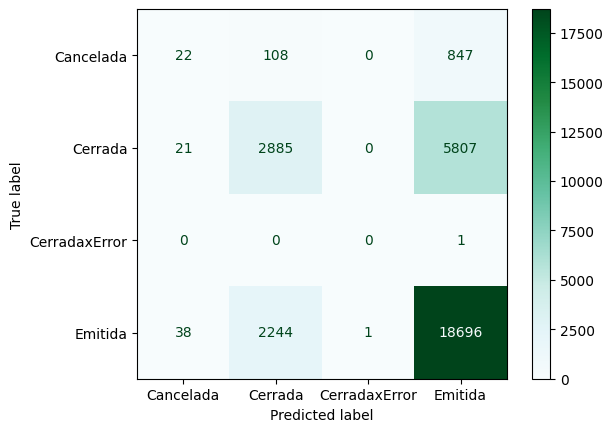

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels= classes)

disp.plot(cmap= plt.cm.BuGn)

In [ ]:
y_pred = catnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"El accuracy del modelo Categorical Naive Bayes es: {accuracy}")

El accuracy del modelo Categorical Naive Bayes es: 0.7043690903162699


**Modelo Naive Bayes - Complement**

In [ ]:
cnb = ComplementNB()
cnb.fit(x_train, y_train)

ComplementNB()

**Reporte del modelo con Naive Bayes - Complement**

In [ ]:
train_acc = cnb.score(x_train, y_train)
test_acc = cnb.score(x_test,y_test)

# Métrica de entrenamiento
print(train_acc)

# Métrica de test
print(test_acc)

0.363207954290449
0.3646234104988588


In [ ]:
y_train_pred = cnb.predict(x)
print(classification_report(y_cod, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.04      0.31      0.07      6855
           1       0.29      0.42      0.34     61147
           2       0.00      0.00      0.00         6
           3       0.70      0.34      0.46    147217

    accuracy                           0.36    215225
   macro avg       0.26      0.27      0.22    215225
weighted avg       0.56      0.36      0.41    215225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Matriz de confusión del modelo**


In [ ]:
y_pred_tree = cnb.predict(x_test)
matrix_c = confusion_matrix(y_test, y_pred_tree)

pd.crosstab(y_test, y_pred_tree, rownames=['True0'],colnames=['Predicciones'],margins=True)

Predicciones,0,1,3,All
True0,,,,
0,300,319,358,977
1,2300,3676,2737,8713
2,0,1,0,1
3,5388,8384,7207,20979
All,7988,12380,10302,30670


In [ ]:
# Matriz de confusion
mc = confusion_matrix(y_test,y_pred)

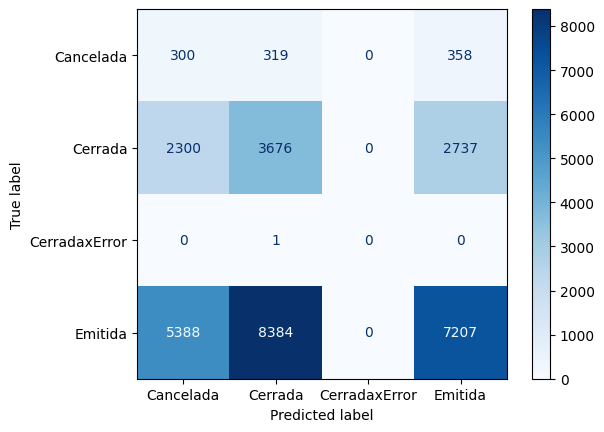

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels= classes)

disp.plot(cmap= plt.cm.Blues)

In [ ]:
y_pred = cnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"El accuracy del modelo Complement Naive Bayes es: {accuracy}")

El accuracy del modelo Complement Naive Bayes es: 0.3646234104988588


**Modelo Naive Bayes - Bernoulli**

In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

**Reporte del modelo con Naive Bayes - Bernoulli**

In [ ]:
train_acc = bnb.score(x_train, y_train)
test_acc = bnb.score(x_test,y_test)

# Métrica de entrenamiento
print(train_acc)

# Métrica de test
print(test_acc)

0.6840148912787051
0.684023475709162


In [ ]:
y_train_pred = bnb.predict(x)
print(classification_report(y_cod, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6855
           1       0.00      0.00      0.00     61147
           2       0.00      0.00      0.00         6
           3       0.68      1.00      0.81    147217

    accuracy                           0.68    215225
   macro avg       0.17      0.25      0.20    215225
weighted avg       0.47      0.68      0.56    215225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Matriz de confusión del modelo**

In [ ]:
y_pred_tree = bnb.predict(x_test)
matrix_c = confusion_matrix(y_test, y_pred_tree)

pd.crosstab(y_test, y_pred_tree, rownames=['True0'],colnames=['Predicciones'],margins=True)

Predicciones,3,All
True0,,
0,977,977
1,8713,8713
2,1,1
3,20979,20979
All,30670,30670


In [ ]:
# Matriz de confusion
mc = confusion_matrix(y_test,y_pred)

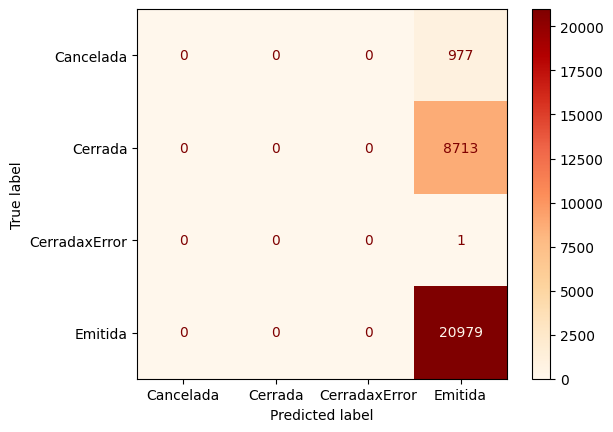

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels= classes)

disp.plot(cmap= plt.cm.OrRd)

In [ ]:
y_pred = bnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"El accuracy del modelo Bernoulli Naive Bayes es: {accuracy}")

El accuracy del modelo Bernoulli Naive Bayes es: 0.684023475709162


# **Conclusiones Actividad N°3 - ML de aprendizaje supervisado, clasificación**

A partir de la realización de la actividad N°3 en la que se aplican los conceptos aprendidos de ML, en modelos de aprendizaje supervisado a un entorno de clasificación, podemos concluir que:

1.   El poder acceder a distintos métodos de entrenamiento, mediante los diferentes modelos, para así decidir cuál es la mejor opción a elegir, entre los cuales están: **KNN, Árboles de decisión, SVM, Modelo de Naive Bayes**
2.   Que a partir de estos modelos, a su vez estos tienen "variantes" en las que pueden mejorar o emperar los resultados del entrenamiento, como lo puede ser Naive Bayes y sus variantes como Bernoulli, Categorical, Complement, entre otras.
3. Que existen métodos que su tiempo de demora a la hora de entrenar el modelo es mucho menor a otros. Por ejemplo Los modelos de Naive Bayes no toma mucho tiempo para su entremiento, lo contrario al modelo SVM (Support Vector Machine), que por lo menos ***en nuestro caso, y nuestro dataset*** el SVM en su variante "Sigmoid" dura 37min su ejecución, la variante "linear" dura 43min, y los árboles de decisión duran alrededor de los 13min.
4. A partir de la conclusión anterior desconocemos la razón exacta y técnica del porque la larga duración a la hroa de entrenar los modelos, podría deberse a la magnitud del dataset, tanto comola forma de aplicarse estos modelos al mismo, o las capacidades del software que estamos usando (Gogle Colab en este caso). También podriamos pensar si el lenguaje que se esta usando (Python) es el ideal para el uso de estos modelos en especifico.
5. Si bien nuestros resultados no se aplican en el mejor contexto a los terminos que se deben aplicar en "la vida real", los modelos que nos dió los mejores resultados aplicados a nuestro dataset fueron:
    *   Árboles de decisión
    *   Modelo de Naive Bayes, en su variante **Categorical**



